In [ ]:
# New York City Airbnb Open Data
#https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [4]:
df = pd.read_csv('/Users/kaykay/Downloads/Kaggle Data/new-york-city-airbnb-open-data/AB_NYC_2019.csv')

In [38]:
df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [39]:
df.isnull().sum()
#Should drop last_review and host_name because of the null amounts and the irrelevants of the name

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [40]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
id                                48895 non-null int64
name                              48879 non-null object
host_id                           48895 non-null int64
host_name                         48874 non-null object
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
last_review                       38843 non-null object
reviews_per_month                 38843 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64

In [42]:
df.drop(['id','last_review', 'host_name' ], axis = 1, inplace = True )
df.head(5)

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [43]:
#reviews per month has null value so we want to change those to 0
df.fillna({'reviews_per_month':0}, inplace=True)
df.isnull().sum()

name                              16
host_id                            0
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64

In [44]:
df.head(5)

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


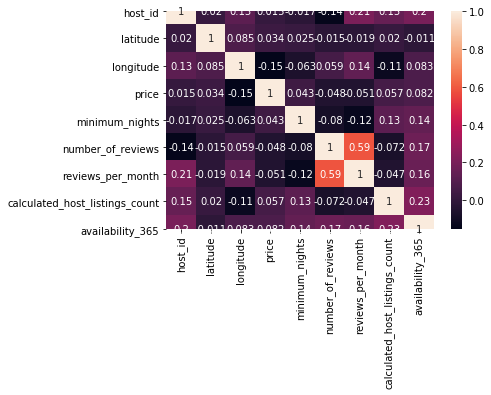

In [49]:
sns.heatmap(df.corr(), annot=True)

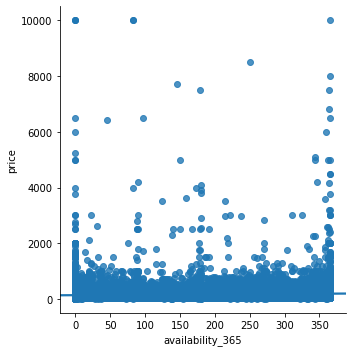

In [52]:
#Check the correlation between availability and price
sns.lmplot(x ='availability_365',y ='price', data = df)

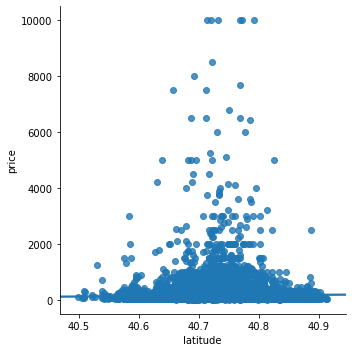

In [55]:
#Check the correlation between calculated_host_listings_count and price
sns.lmplot(x ='calculated_host_listings_count',y ='price', data = df)

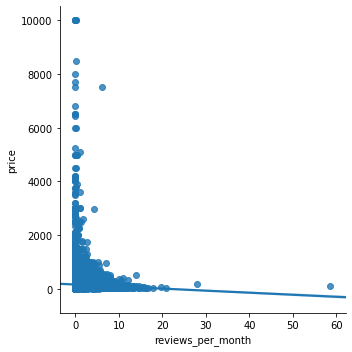

In [54]:
sns.lmplot(x ='reviews_per_month',y ='price', data = df)

In [56]:
df.columns


Index(['name', 'host_id', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

In [63]:
#Training and testing the quantitive values in the dataset

X = df[['latitude','longitude', 'minimum_nights' ,'reviews_per_month','number_of_reviews','availability_365','calculated_host_listings_count' ]]
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.4, random_state=101)
lm = LinearRegression()





In [64]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [65]:
lm.coef_

array([ 1.83731893e+02, -7.78891657e+02,  2.11056618e-01, -2.56886941e+00,
       -2.36504716e-01,  1.81202874e-01,  7.14896155e-02])

In [58]:
pd.DataFrame(lm.coef_,X.columns, columns=['Coeff'])

,Coeff
latitude,183.731893
longitude,-778.891657
minimum_nights,0.211057
reviews_per_month,-2.568869
number_of_reviews,-0.236505
availability_365,0.181203
calculated_host_listings_count,0.071490


In [59]:
#From the quantitive it seems only the latitude correlates have the most impact on price.

prediction = lm.predict(X_test)

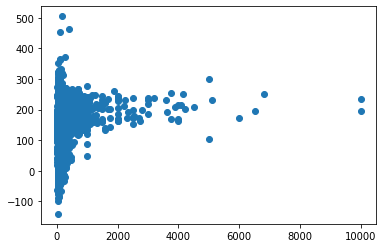

In [60]:
plt.scatter(y_test,prediction)

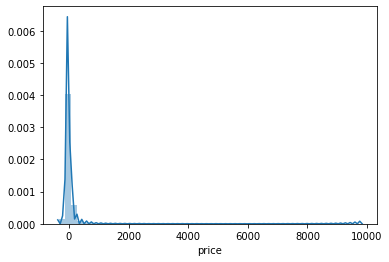

In [61]:
sns.distplot((y_test-prediction))
#left skewed

In [62]:
metrics.mean_absolute_error(y_test,prediction)
metrics.mean_squared_error(y_test,prediction)
np.sqrt(metrics.mean_squared_error(y_test,prediction))
(metrics.explained_variance_score(y_test,prediction))


0.04314484825718434

In [ ]:
############################### Qualitive Analysis ###########################################


In [66]:
df.columns


Index(['name', 'host_id', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 13 columns):
name                              48879 non-null object
host_id                           48895 non-null int64
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
reviews_per_month                 48895 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64
dtypes: float64(3), int64(6), object(4)
memory usage: 4.8+ MB


In [70]:
#Lets have a look at how appartments are priced depending on the area(neighbourhood)
df['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [76]:
#lets get the prices for each area['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx']

pric_brook = df.loc[df['neighbourhood_group'] == 'Brooklyn'][['price']]
pric_manh = df.loc[df['neighbourhood_group'] == 'Manhattan'][['price']]
pric_queen = df.loc[df['neighbourhood_group'] == 'Queens'][['price']]
pric_sta_island = df.loc[df['neighbourhood_group'] == 'Staten Island'][['price']]
pric_bronx = df.loc[df['neighbourhood_group'] == 'Bronx'][['price']]

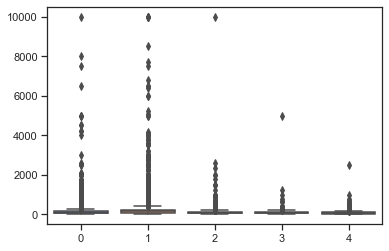

In [88]:
price_by_neigh = [pric_brook,pric_manh,pric_queen,pric_sta_island,pric_bronx]
neigh_names=['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx']

sns.boxplot(data = price_by_neigh)

In [103]:
#we can see there are extreme values causing us not see the data clearer
price_by_neig_2 = []

#loop through statistical values:

for pric_list in price_by_neigh:
    item = pric_list.describe(percentiles=[.25, .50, .75])
    item = item.iloc[1:]
    item.reset_index(inplace=True)
    item.rename(columns={'index':'Stats'}, inplace=True)
    price_by_neig_2.append(item)
    
#Naming the price columns the name of the areas

price_by_neig_2[0].rename(columns={'price':neigh_names[0]}, inplace=True)
price_by_neig_2[1].rename(columns={'price':neigh_names[1]}, inplace=True)
price_by_neig_2[2].rename(columns={'price':neigh_names[2]}, inplace=True)
price_by_neig_2[3].rename(columns={'price':neigh_names[3]}, inplace=True)
price_by_neig_2[4].rename(columns={'price':neigh_names[4]}, inplace=True)

In [104]:
price_stats = price_by_neig_2
price_stats = [table.set_index('Stats') for table in price_stats]
price_stats = price_stats[0].join(price_stats[1:])
price_stats

,Brooklyn,Manhattan,Queens,Staten Island,Bronx
Stats,,,,,
mean,124.383207,196.875814,99.517649,114.812332,87.496792
std,186.873538,291.383183,167.102155,277.620403,106.709349
min,0.000000,0.000000,10.000000,13.000000,0.000000
25%,60.000000,95.000000,50.000000,50.000000,45.000000
50%,90.000000,150.000000,75.000000,75.000000,65.000000
75%,150.000000,220.000000,110.000000,110.000000,99.000000
max,10000.000000,10000.000000,10000.000000,5000.000000,2500.000000


Text(0.5, 1.0, 'Distributed Prices per Neighbourhood')

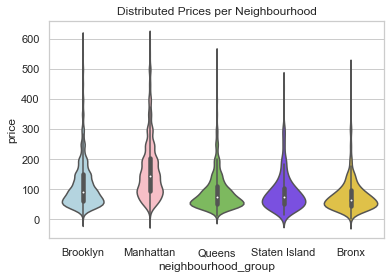

In [120]:
#from our box plot previously, we had a lot of extreme values, causing us not to be able to see the data in details
price_vs_neigh = df[df.price < 600]

#let us plot the density and distribution of prices

# Set theme
sns.set_style('whitegrid')
 
# Violin plot
price_neighb_plot = sns.violinplot(x='neighbourhood_group', y='price', data=price_vs_neigh,  palette=["lightblue", "lightpink",'#78C850','#7038F8','#F8D030' ])
price_neighb_plot.set_title('Distributed Prices per Neighbourhood')


In [ ]:
# Now we see clearly that manhattan has more appartments that are pricey, next booklyn. Bronx and queens have similar distributions
#but bronx clearly has a lower price distribution.

#Does room type have an effect on price


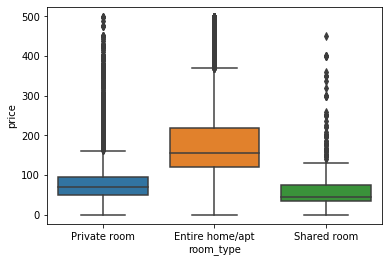

In [7]:
price_less_than = df[df.price < 500]


ax=sns.boxplot(x="room_type", y='price', data=price_less_than)
ax

In [ ]:
#We can see above that the majority of the room types available in new york listing
#is Entire home, then private room

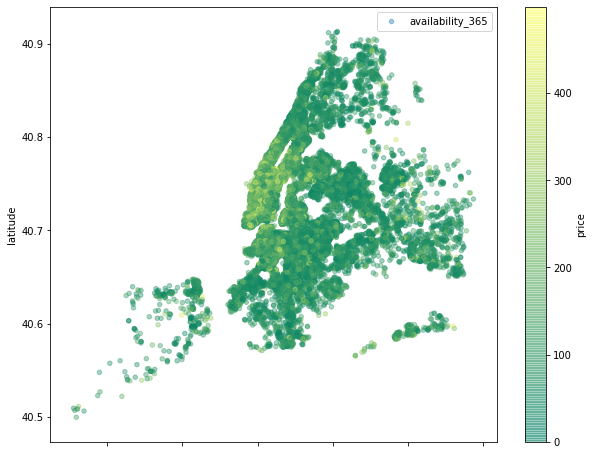

In [16]:
map_ny=price_less_than.plot(kind='scatter', x='longitude', y='latitude', label='availability_365', c='price',
                  cmap=plt.get_cmap('summer'), colorbar=True, alpha=0.4, figsize=(10,8))
map_ny.legend()